# Análisis de poemas: ¿Qué diferencias estilísticas aparecen en la construcción de imágenes poéticas entre Alfonsina Storni y Alejandra Pizarnik?

# Sección 1: Presentación del Corpus

## 1.1 Descripción del corpus elegido

-Qué tipo de textos incluye: Poemas

-Cuántos documentos: 30

-Período temporal abarcado: 1916 a 1962 (Siglo XX)

-Fuentes utilizadas: CiudadSeva.com, Poemasdelalma.com, Poesi.as

## 1.2 Justificación de la elección

- Elegí este corpus porque reúne poemas de dos autors argentinas destacadas, Alfonsina Storni y Alejandra Pizarnik, de épocas distintas (principios del siglo XX vs. mediados del siglo XX). Esto me permite comparar estilos literarios, construcción poética y uso del lenguaje en contextos históricos y culturales distintos, pero dentro de un mismo género: la poesía. Además, es un corpus manejable (30 textos) y accesible en formato digital para análisis computacional.

- Me interesa identificar diferencias estilísticas en la construcción de imágenes poéticas entre ambas autors. Por ejemplo, analizar la longitud de los poemas, frecuencia de ciertas palabras, patrones de rima, repetición de temas o palabras clave, y cómo cada autor transmite emociones o ideas a través de su lenguaje. También quiero explorar si se pueden detectar rasgos distintivos que permitan “perfilarlas” automáticamente mediante NLP.

- Hipótesis
    * Los poemas de Storni, siendo de la primera mitad del siglo XX, probablemente tengan un lenguaje más formal y estructurado, con rimas más regulares y vocabulario clásico.
    * Los de Pizarnik, al ser más contemporáneos y personales, tenderán a un estilo más fragmentado, introspectivo y experimental, con recursos estilísticos modernos y mayor densidad de imágenes subjetivas.
    * Se podrán identificar patrones de palabras o construcciones sintácticas que diferencien claramente a cada autor, lo que podría usarse para clasificación automática de textos poéticos.

## 1.3 Proceso de recolección

- Cómo obtuviste los textos: Copy-paste desde sitios web

- Criterios de inclusión/exclusión: Tome los poemas mas conocidos de ambas autors segun su disponibilidad en la web.

- Dificultades encontradas y cómo las resolviste: No se presentaron dificultades ya que busque los poemas mas conocidos de las autors y los copie y pegue en un bloc de notas para obtener el formarto txt.

## 1.4 Estadísticas básicas

- Número total de textos: 30
- Número total de palabras (aproximado): 4920
- Distribución de tamaños de documentos: El corpus está compuesto por 30 poemas, 15 de Alfonsina Storni y 15 de Alejandra Pizarnik. La longitud de los textos varía notablemente, con un rango que va desde alrededor de 20 palabras hasta más de 1800. En el caso de Storni, la mayoría de los poemas se concentran entre 100 y 200 palabras, con algunos más breves y otros de mayor extensión, pero dentro de una variación moderada. En cambio, los poemas de Pizarnik muestran una mayor dispersión: predominan los textos muy breves (20 a 50 palabras), aunque también se incluyen composiciones de considerable extensión, como Aproximaciones, que supera ampliamente las 1000 palabras. Esta diferencia evidencia dos estilos contrastantes en cuanto al uso de la brevedad y la extensión poética.
- Gráfico de distribución temporal (si aplicable)


## 1.5 Exploración inicial
- Mostrar fragmentos representativos
- Primeras observaciones cualitativas
- Nube de palabras inicial (opcional)

In [1]:
# Preparación de librerías a utilizar

# Instalamos dependencias en modo "quiet"
#Windows
%pip install pandas numpy scikit-learn spacy matplotlib matplotlib_venn seaborn nltk wordcloud -q
#Linux
#!pip install pandas numpy scikit-learn spacy matplotlib seaborn nltk wordcloud -q

# Descargamos modelos de spaCy en español
!python -m spacy download es_core_news_md -q

# Librerías estándar de Python
import os
import pickle
import re
import string
from collections import Counter

# Librerías de terceros (análisis y NLP)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import spacy

import nltk
from nltk.corpus import stopwords
from matplotlib_venn import venn2
from wordcloud import WordCloud

from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Configuración inicial de NLTK
nltk.download('stopwords')
nltk.download('punkt')

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tamara\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tamara\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Fragmentos de ejemplo:

01_Adios_-_Alfonsina_Storni.txt (primeros 200 caracteres):
Adios - Alfonsina Storni 

Las cosas que mueren jamás resucitan,
las cosas que mueren no tornan jamás.
¡Se quiebran los vasos y el vidrio que queda
es polvo por siempre y por siempre será!

Cuando los
------------------------------------------------------------
02_A_la_tristeza_de_Buenos_Aires_-_Alfonsina_Storni.txt (primeros 200 caracteres):
A la tristeza de Buenos Aires - Alfonsina Storni

Tristes calles derechas, agrisadas e iguales,
por donde asoma, a veces, un pedazo de cielo,
sus fachadas oscuras y el asfalto del suelo
me apagaron lo
------------------------------------------------------------
03_Alma_desnuda_-_Alfonsina_Storni.txt (primeros 200 caracteres):
Alma desnuda - Alfonsina Storni

Soy un alma desnuda en estos versos,
Alma desnuda que angustiada y sola
Va dejando sus pétalos dispersos.

Alma que puede ser una amapola,
Que puede ser un lirio, una 
-------------------------------------------

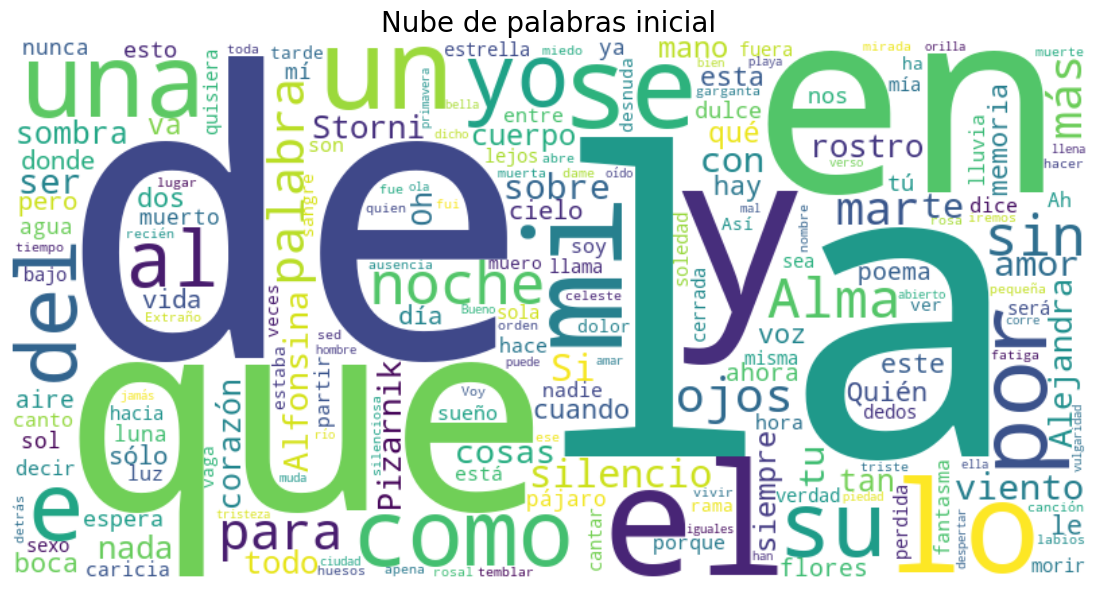

In [2]:
# Cargamos directorio de textos
directorio = '../corpus/raw_texts'

# Buscamos los textos
archivos = sorted(os.listdir(directorio))

# Cargamos en corpus_raw un diccionario con los textos
corpus_raw = {}
for archivo in archivos:
    ruta = os.path.join(directorio, archivo)
    with open(ruta, 'r', encoding='utf-8') as f:
        corpus_raw[archivo] = f.read()

# Mostramos fragmentos representativos
print("Fragmentos de ejemplo:\n")
for archivo, texto in list(corpus_raw.items())[:5]:
    print(f"{archivo} (primeros 200 caracteres):\n{texto[:200]}\n{'-'*60}")

# Obtenemos algunas estadísticas básicas
longitudes_palabras = [len(texto.split()) for texto in corpus_raw.values()]
longitudes_caracteres = [len(texto) for texto in corpus_raw.values()]

print(f"Número de documentos: {len(corpus_raw)}")
print(f"Promedio de palabras por documento: {np.mean(longitudes_palabras):.1f}")
print(f"Documento más corto: {np.min(longitudes_palabras)} palabras")
print(f"Documento más largo: {np.max(longitudes_palabras)} palabras\n")

print(f"Promedio de caracteres por documento: {np.mean(longitudes_caracteres):.1f}")
print(f"Documento más corto (caracteres): {np.min(longitudes_caracteres)}")
print(f"Documento más largo (caracteres): {np.max(longitudes_caracteres)}\n")

# Nube de palabras preliminar
texto_completo = " ".join(corpus_raw.values())
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(texto_completo)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de palabras inicial", fontsize=20)
plt.show()

# Sección 2: Preprocesamiento

## 2.1 Carga y organización de datos


In [3]:
# Cargar los textos y los metadatos

# Método que permite la carga de corpus de un directorio específico + metadata
def cargar_corpus(directorio_textos, archivo_metadata):
    """
    Cargar corpus desde directorio de textos y archivo de metadatos.
    Retorna:
        textos (dict): clave = nombre archivo, valor = texto del poema.
        metadata (DataFrame): información extra (autor, título, año, etc.).
    """
    # Cargar archivo de metadatos
    metadata = pd.read_csv(archivo_metadata)

    # Crear diccionario de textos
    textos = {}
    for _, row in metadata.iterrows():
        archivo_path = os.path.join(directorio_textos, row['archivo'])
        with open(archivo_path, 'r', encoding='utf-8') as f:
            textos[row['archivo']] = f.read()

    return textos, metadata

# Uso de la función
corpus_textos, corpus_metadata = cargar_corpus(
    '../corpus/raw_texts',
    '../corpus/metadata.csv'
)

# En corpus_textos tengo un dict con los poemas.
# En corpus_metadata tengo la tabla de metadatos (autor, título, etc.).

# Función que permite verificar integridad del corpus
def verificar_integridad(textos, metadata, directorio):
    """
    Verificar:
    - Que los archivos listados en metadata existan en el directorio.
    - Que no haya archivos extra en el directorio.
    - Que no existan archivos vacíos.
    """
    archivos_metadata = set(metadata['archivo'])
    archivos_directorio = set(os.listdir(directorio))

    faltantes = archivos_metadata - archivos_directorio
    extras = archivos_directorio - archivos_metadata
    vacíos = [a for a, t in textos.items() if not t.strip()]

    return faltantes, extras, vacíos

# Verificamos integridad del corpus con la función verificar_integridad

faltantes, extras, vacíos = verificar_integridad(
    corpus_textos, corpus_metadata,
    '../corpus/raw_texts'
)

print("Faltantes en directorio:", faltantes) # Textos que están en metadata, pero no en directorio de textos
print("Archivos no declarados en metadata:", extras) # Textos que están en directorio, pero no en metadata
print("Archivos vacíos:", vacíos) # Textos vacíos

# Este paso asegura que los archivos .txt coincidan con lo declarado en metadata. Así evitamos problemas al procesar.

# Inspección rápida de los textos
primer_archivo = list(corpus_textos.keys())[0] # Obtenemos el nombre del primer archivo / Se puede cambiar por cualquier archivo de metadata.

print("Archivo de ejemplo:", primer_archivo)
print("Primeros 300 caracteres:\n")
print(corpus_textos[primer_archivo][:300]) # Mostramos los primeros 300 caracteres para validar que se haya podido leer correctamente.



Faltantes en directorio: set()
Archivos no declarados en metadata: set()
Archivos vacíos: []
Archivo de ejemplo: 01_Adios_-_Alfonsina_Storni.txt
Primeros 300 caracteres:

Adios - Alfonsina Storni 

Las cosas que mueren jamás resucitan,
las cosas que mueren no tornan jamás.
¡Se quiebran los vasos y el vidrio que queda
es polvo por siempre y por siempre será!

Cuando los capullos caen de la rama
dos veces seguidas no florecerán...
¡Las flores tronchadas por el viento i


## 2.2 Limpieza de texto

In [4]:
# Declaramos función para realizar limpieza de un texto
def limpiar_texto(texto):
    """Aplicar preprocesamiento básico a texto"""

    # Eliminamos primera línea (título - autor)
    lineas = texto.splitlines() # Separamos en "filas"
    texto = " ".join(lineas[1:]) # Unimos las "filas", exceptuando la primera

    # Convertimos a minúsculas
    texto = texto.lower()

    # Eliminamos puntuaciones ASCII (string.punctuation) y adicionales ("¡" y "¿")
    signos_extra = "¿¡"
    texto = re.sub(f"[{re.escape(string.punctuation + signos_extra)}]", " ", texto)

    # Eliminamos números
    texto = re.sub(r'\d+', ' ', texto)

    # Eliminamos espacios extra y saltos de línea
    texto = re.sub(r'\s+', ' ', texto).strip()

    return texto

# Aplicamos limpieza de textos sobre corpus
corpus_textos_limpios = {}
for archivo, texto in corpus_textos.items():
    corpus_textos_limpios[archivo] = limpiar_texto(texto)

# Inspección rápida de los textos con el primer archivo
print("Archivo de ejemplo:", primer_archivo)
print("\n\nPrimeros 300 caracteres [ORIGINAL]:\n")
print(corpus_textos[primer_archivo][:300])  # Mostramos texto original
print("\n\nPrimeros 300 caracteres [LIMPIO]:\n")
print(corpus_textos_limpios[primer_archivo][:300]) # Mostramos texto limpio


Archivo de ejemplo: 01_Adios_-_Alfonsina_Storni.txt


Primeros 300 caracteres [ORIGINAL]:

Adios - Alfonsina Storni 

Las cosas que mueren jamás resucitan,
las cosas que mueren no tornan jamás.
¡Se quiebran los vasos y el vidrio que queda
es polvo por siempre y por siempre será!

Cuando los capullos caen de la rama
dos veces seguidas no florecerán...
¡Las flores tronchadas por el viento i


Primeros 300 caracteres [LIMPIO]:

las cosas que mueren jamás resucitan las cosas que mueren no tornan jamás se quiebran los vasos y el vidrio que queda es polvo por siempre y por siempre será cuando los capullos caen de la rama dos veces seguidas no florecerán las flores tronchadas por el viento impío se agotan por siempre por siemp


## 2.3 Tokenización y normalización

In [5]:
# Cargamos el modelo mediano de SpaCy para español
nlp = spacy.load("es_core_news_md")

# Función para tokenizar texto (separación en palabras) y lematización
def tokenizar_y_lemmatizar(texto):
    """
    Tokenizar y aplicar lematización con spaCy.
    - La tokenización de spaCy es más robusta que un split simple.
    - Se elige lematización en lugar de stemming porque:
        * Preserva el significado de las palabras (importante en poesía).
        * Evita deformaciones de palabras que genera el stemming.
    """
    doc = nlp(texto)

    # Extraer lemas de tokens
    return [token.lemma_ for token in doc]

# Aplicamos función sobre textos de corpus limpio y guardamos en corpus_lemmatizado
corpus_lemmatizado = {
    archivo: tokenizar_y_lemmatizar(texto)
    for archivo, texto in corpus_textos_limpios.items()
}

# Obtener los primeros 3 archivos del corpus
primeros_archivos = list(corpus_textos_limpios.keys())[:3]

# Ciclamos primeros_archivos para mostrar ejemplos de antes y despues de tokenizacion y normalización
for archivo in primeros_archivos:
    print(f"Archivo: {archivo}\n")

    print("Texto limpio (primeros 300 caracteres):")
    print(corpus_textos_limpios[archivo][:300]) # Texto limpio (300 caracteres)

    print("\nTokens lematizados (primeros 30):")
    print(corpus_lemmatizado[archivo][:30]) # Texto limpio y lemmatizado (30 palabras)

    print("\n" + "="*50 + "\n")

Archivo: 01_Adios_-_Alfonsina_Storni.txt

Texto limpio (primeros 300 caracteres):
las cosas que mueren jamás resucitan las cosas que mueren no tornan jamás se quiebran los vasos y el vidrio que queda es polvo por siempre y por siempre será cuando los capullos caen de la rama dos veces seguidas no florecerán las flores tronchadas por el viento impío se agotan por siempre por siemp

Tokens lematizados (primeros 30):
['el', 'cosa', 'que', 'morir', 'jamás', 'resucitar', 'el', 'cosa', 'que', 'morir', 'no', 'tornar', 'jamás', 'él', 'quebrar', 'el', 'vaso', 'y', 'el', 'vidrio', 'que', 'quedar', 'ser', 'polvo', 'por', 'siempre', 'y', 'por', 'siempre', 'ser']


Archivo: 02_A_la_tristeza_de_Buenos_Aires_-_Alfonsina_Storni.txt

Texto limpio (primeros 300 caracteres):
tristes calles derechas agrisadas e iguales por donde asoma a veces un pedazo de cielo sus fachadas oscuras y el asfalto del suelo me apagaron los tibios sueños primaverales cuánto vagué por ellas distraída empapada en el vaho grisác

## 2.4 Manejo de stop words

In [6]:
# Cargamos stopwords estándar en español
stopwords_es = set(stopwords.words('spanish'))

# Verificamos frecuencias de palabras para identificar stopwords específicos del dominio
todos_tokens = [token for tokens in corpus_lemmatizado.values() for token in tokens] # Unimos todos los tokens lematizados del corpus
frecuencias = Counter(todos_tokens) # Contamos la frecuencia de cada token

# Mostramos las 50 palabras más frecuentes
print("Top 50 palabras más frecuentes (para identificar stopwords del dominio):\n")
print(frecuencias.most_common(50))

Top 50 palabras más frecuentes (para identificar stopwords del dominio):

[('el', 399), ('de', 215), ('que', 166), ('en', 150), ('y', 121), ('él', 118), ('uno', 113), ('yo', 112), ('ser', 92), ('mi', 85), ('no', 75), ('a', 70), ('por', 43), ('como', 40), ('su', 37), ('haber', 37), ('este', 34), ('del', 31), ('ir', 30), ('noche', 29), ('al', 28), ('decir', 27), ('sin', 27), ('tú', 26), ('para', 23), ('alma', 21), ('ojo', 21), ('más', 20), ('palabra', 20), ('todo', 19), ('si', 19), ('mar', 19), ('silencio', 19), ('viento', 18), ('tanto', 18), ('amor', 18), ('tu', 17), ('sobre', 17), ('con', 17), ('cosa', 16), ('corazón', 15), ('estar', 15), ('rostro', 15), ('sombra', 14), ('nada', 14), ('voz', 14), ('morir', 13), ('siempre', 13), ('cuerpo', 13), ('hacer', 13)]


In [7]:
# Decidimos stopwords específicas del dominio:
# - Revisando las palabras más frecuentes, algunas son comunes en poesía pero no aportan discriminación entre Storni y Pizarnik.
# - Se agregan a stopwords_poeticas aquellas palabras más frecuentes no relevantes
stopwords_poeticas = set(['el','de','que','en','y','uno','ir','a','no','por','como','su','este','del','al','sin','para','más','si','tanto','tu','sobre','con'])

# Unimos stopwords estándar + del dominio
stopwords_total = stopwords_es.union(stopwords_poeticas)

# Función para eliminar stopwords
def eliminar_stopwords(tokens, stopwords_set):
    """
    Elimina stopwords de una lista de tokens.

    - Elimina palabras frecuentes y poco informativas.
    - Permite que análisis de frecuencia y nubes de palabras resalten
      diferencias léxicas significativas entre autores.
    """
    return [t for t in tokens if t not in stopwords_set]

# Eliminamos stopwords del corpus lematizado
corpus_sin_stopwords = {
    archivo: eliminar_stopwords(tokens, stopwords_total)
    for archivo, tokens in corpus_lemmatizado.items()
}

# Mostramos impacto de eliminar stopwords en primeros_archivos
for archivo in primeros_archivos:
    print(f"\nArchivo: {archivo}\n")
    print("Tokens lematizados (primeros 20):")
    print(corpus_lemmatizado[archivo][:20])

    print("\nTokens sin stopwords (primeros 20):")
    print(corpus_sin_stopwords[archivo][:20])

    print("\n" + "="*50)


Archivo: 01_Adios_-_Alfonsina_Storni.txt

Tokens lematizados (primeros 20):
['el', 'cosa', 'que', 'morir', 'jamás', 'resucitar', 'el', 'cosa', 'que', 'morir', 'no', 'tornar', 'jamás', 'él', 'quebrar', 'el', 'vaso', 'y', 'el', 'vidrio']

Tokens sin stopwords (primeros 20):
['cosa', 'morir', 'jamás', 'resucitar', 'cosa', 'morir', 'tornar', 'jamás', 'quebrar', 'vaso', 'vidrio', 'quedar', 'ser', 'polvo', 'siempre', 'siempre', 'ser', 'capullo', 'caer', 'rama']


Archivo: 02_A_la_tristeza_de_Buenos_Aires_-_Alfonsina_Storni.txt

Tokens lematizados (primeros 20):
['triste', 'calle', 'derecho', 'agrisada', 'e', 'igual', 'por', 'donde', 'asomar', 'a', 'veces', 'uno', 'pedazo', 'de', 'cielo', 'su', 'fachada', 'oscuro', 'y', 'el']

Tokens sin stopwords (primeros 20):
['triste', 'calle', 'derecho', 'agrisada', 'igual', 'asomar', 'veces', 'pedazo', 'cielo', 'fachada', 'oscuro', 'asfalto', 'suelo', 'apagar', 'tibio', 'sueño', 'primaveral', 'cuánto', 'vaguer', 'distraído']


Archivo: 03_Alma_desnuda_

## 2.5 Estadísticas post-procesamiento

In [8]:
# Vocabulario final por poema
vocabulario_poema = {archivo: set(tokens) for archivo, tokens in corpus_sin_stopwords.items()}

# Número de palabras únicas por poema
vocabulario_unico = {archivo: len(tokens_unicos) for archivo, tokens_unicos in vocabulario_poema.items()}

# Mostramos cantidad de palabras únicas de cada texto
print("Número de palabras únicas por poema:\n")
for archivo in corpus_sin_stopwords:
    print(f"{archivo}: {vocabulario_unico[archivo]} palabras únicas")


# Distribución de frecuencias de palabras

# Frecuencias antes de eliminar stopwords
todos_tokens_lemmatizados = [token for tokens in corpus_lemmatizado.values() for token in tokens]
frecuencias_antes = Counter(todos_tokens_lemmatizados)

print("\nTop 20 palabras más frecuentes antes de eliminar stopwords:\n")
print(frecuencias_antes.most_common(20))

# Contamos todas las palabras del corpus preprocesado
todos_tokens_sin_stopwords = [token for tokens in corpus_sin_stopwords.values() for token in tokens]
frecuencias_final = Counter(todos_tokens_sin_stopwords)

# Mostrar top 20 palabras más frecuentes en todo el corpus
print("\nTop 20 palabras más frecuentes después de preprocesamiento y eliminación de stopwords:\n")
print(frecuencias_final.most_common(20))

# - Comparando antes y después, se puede observar cómo la eliminación de stopwords resalta términos más significativos.
# - Esto permite identificar vocabulario característico de cada autor.


Número de palabras únicas por poema:

01_Adios_-_Alfonsina_Storni.txt: 60 palabras únicas
02_A_la_tristeza_de_Buenos_Aires_-_Alfonsina_Storni.txt: 53 palabras únicas
03_Alma_desnuda_-_Alfonsina_Storni.txt: 95 palabras únicas
04_Dolor_-_Alfonsina_Storni.txt: 73 palabras únicas
05_Dos_palabras_-_Alfonsina_Storni.txt: 44 palabras únicas
06_Frente_al_mar_-_Alfonsina_Storni.txt: 102 palabras únicas
07_Indolencia_-_Alfonsina_Storni.txt: 60 palabras únicas
08_La_inquitud_del_rosal_-_Alfonsina_Storni.txt: 21 palabras únicas
09_La_caricia_perdida_-_Alfonsina_Storni.txt: 48 palabras únicas
10_Tu_que_nunca_seras_-_Alfonsina_Storni.txt: 40 palabras únicas
11_Paz_-_Alfonsina_Storni.txt: 22 palabras únicas
12_Viaje_-_Alfonsina_Storni.txt: 47 palabras únicas
13_Voy_a_dormir_-_Alfonsina_Storni.txt: 49 palabras únicas
14_Yo_en_el_fondo_del_mar_-_Alfonsina_Storni.txt: 42 palabras únicas
15_Pudiera_ser_-_Alfonsina_Storni.txt: 42 palabras únicas
16_La_carencia_-_Alejandra_Pizarnik.txt: 10 palabras únicas


### Comparativa entre autoras

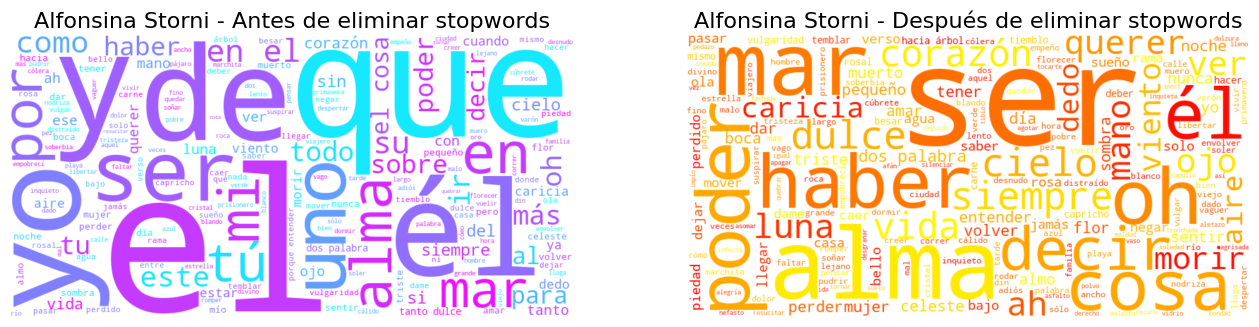

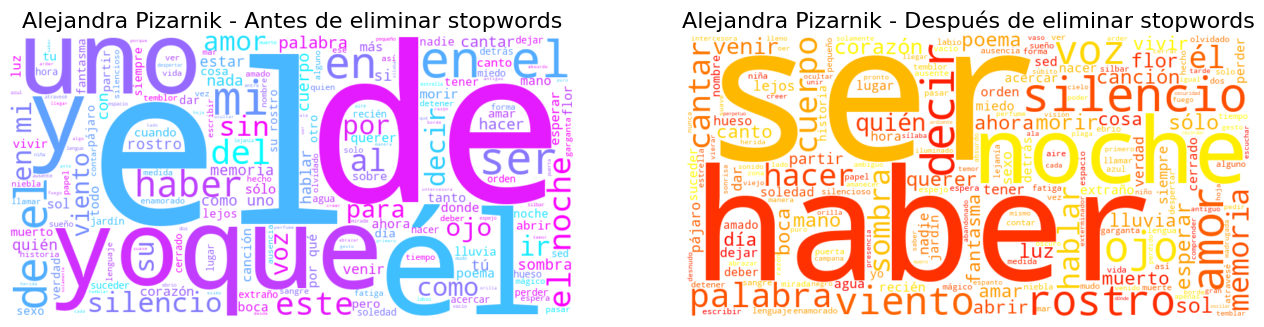

In [9]:

# Creamos diccionarios para tokens antes y después de stopwords
tokens_por_autor_antes = {}
tokens_por_autor_despues = {}

for _, row in corpus_metadata.iterrows():
    archivo = row['archivo']
    autor = row['autor']

    # Tokens antes de eliminar stopwords
    tokens_antes = corpus_lemmatizado.get(archivo, [])
    if autor not in tokens_por_autor_antes:
        tokens_por_autor_antes[autor] = []
    tokens_por_autor_antes[autor].extend(tokens_antes)

    # Tokens después de eliminar stopwords
    tokens_despues = corpus_sin_stopwords.get(archivo, [])
    if autor not in tokens_por_autor_despues:
        tokens_por_autor_despues[autor] = []
    tokens_por_autor_despues[autor].extend(tokens_despues)


# Generamos gráficos con 2 nubes por autor (antes y después de preprocesamiento)

for autor in tokens_por_autor_antes.keys():
    fig, axs = plt.subplots(1, 2, figsize=(16, 8))

    # Nube antes del preprocesamiento (stopwords incluidas)
    texto_antes = " ".join(tokens_por_autor_antes[autor])
    nube_antes = WordCloud(width=800, height=400, background_color="white",
                            colormap="cool").generate(texto_antes)
    axs[0].imshow(nube_antes, interpolation="bilinear")
    axs[0].axis("off")
    axs[0].set_title(f"{autor} - Antes de eliminar stopwords", fontsize=16)

    # Nube después del preprocesamiento (stopwords eliminadas)
    texto_despues = " ".join(tokens_por_autor_despues[autor])
    nube_despues = WordCloud(width=800, height=400, background_color="white",
                             colormap="autumn").generate(texto_despues)
    axs[1].imshow(nube_despues, interpolation="bilinear")
    axs[1].axis("off")
    axs[1].set_title(f"{autor} - Después de eliminar stopwords", fontsize=16)

    plt.show()
    print("\n")

# - Mostrar lado a lado el efecto de eliminar stopwords permite observar cómo palabras muy frecuentes y poco informativas dejan de dominar la nube.
# - Las diferencias léxicas y temáticas entre Storni y Pizarnik se hacen más visibles en la nube de palabras post-stopwords.
# - Colores distintos ayudan a diferenciar visualmente antes y después.

# Sección 3: Análisis con BoW/TF-IDF

## 3.1 Vectorización del corpus - Comparativa por autor

In [10]:
# Función para generar matrices y estadísticas por autor
def vectorizar_por_autor(corpus_dict, metadata, autor):
    print(f"\n=== Autor: {autor} ===")

    # Filtrar documentos del autor
    archivos = metadata[metadata['autor'] == autor]['archivo'].tolist()
    docs = [" ".join(corpus_dict[a]) for a in archivos if a in corpus_dict]

    # Aplicamos CountVectorizer
    vectorizer_count = CountVectorizer(analyzer='word', ngram_range=(1,1),
                                       min_df=1, max_df=0.95)
    X_counts = vectorizer_count.fit_transform(docs)
    vocab_count = vectorizer_count.get_feature_names_out()

    print("\nMatriz CountVectorizer (documento x término):", X_counts.shape)
    print("Número de términos (vocabulario):", len(vocab_count))
    print("Primeros 20 términos:", vocab_count[:20])

    # Aplicamos TF-IDF
    vectorizer_tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,1),
                                       min_df=1, max_df=0.95)
    X_tfidf = vectorizer_tfidf.fit_transform(docs)
    vocab_tfidf = vectorizer_tfidf.get_feature_names_out()

    print("\nMatriz TF-IDF (documento x término):", X_tfidf.shape)
    print("Número de términos (vocabulario):", len(vocab_tfidf))
    print("Primeros 20 términos:", vocab_tfidf[:20])

    # Funciones para inspección de top términos con cada método
    def top_counts(X, vocab, topn=10):
        total_counts = np.asarray(X.sum(axis=0)).flatten()
        top_idx = np.argsort(total_counts)[::-1][:topn]
        return [(vocab[i], int(total_counts[i])) for i in top_idx]

    def top_tfidf(X, vocab, topn=10):
        avg_tfidf = np.asarray(X.mean(axis=0)).flatten()
        top_idx = np.argsort(avg_tfidf)[::-1][:topn]
        return [(vocab[i], float(avg_tfidf[i])) for i in top_idx]

    print("\nTop 10 términos más frecuentes (BoW):", top_counts(X_counts, vocab_count, topn=10))
    print("Top 10 términos más distintivos (TF-IDF):", top_tfidf(X_tfidf, vocab_tfidf, topn=10))

    # Estadísticas globales
    nnz = X_counts.nnz
    density = nnz / (X_counts.shape[0] * X_counts.shape[1])
    print("\nEntradas no-cero (counts):", nnz)
    print(f"Densidad de la matriz: {density:.6f}")

    # Frecuencias
    doc_freq = np.array((X_counts > 0).sum(axis=0)).flatten()
    df_df = pd.DataFrame({'term': vocab_count, 'doc_freq': doc_freq})
    df_df = df_df.sort_values(by='doc_freq', ascending=False)

    print("\nTop 10 términos por número de documentos donde aparecen:\n")
    print(df_df.head(10))

    return X_counts, X_tfidf, df_df


# Aplicamos función para cada autor
X_counts_storni, X_tfidf_storni, df_storni = vectorizar_por_autor(corpus_sin_stopwords, corpus_metadata, "Alfonsina Storni")
X_counts_pizarnik, X_tfidf_pizarnik, df_pizarnik = vectorizar_por_autor(corpus_sin_stopwords, corpus_metadata, "Alejandra Pizarnik")


=== Autor: Alfonsina Storni ===

Matriz CountVectorizer (documento x término): (15, 588)
Número de términos (vocabulario): 588
Primeros 20 términos: ['aber' 'abierto' 'abrirte' 'abrojo' 'abrumar' 'acabar' 'acaso' 'aceite'
 'acertar' 'acosar' 'acunar' 'acurrucado' 'acuéstame' 'adelantar' 'adiós'
 'adorar' 'adormecido' 'adulto' 'afán' 'agotar']

Matriz TF-IDF (documento x término): (15, 588)
Número de términos (vocabulario): 588
Primeros 20 términos: ['aber' 'abierto' 'abrirte' 'abrojo' 'abrumar' 'acabar' 'acaso' 'aceite'
 'acertar' 'acosar' 'acunar' 'acurrucado' 'acuéstame' 'adelantar' 'adiós'
 'adorar' 'adormecido' 'adulto' 'afán' 'agotar']

Top 10 términos más frecuentes (BoW): [('ser', 50), ('alma', 20), ('mar', 16), ('oh', 12), ('haber', 11), ('poder', 11), ('cosa', 10), ('él', 10), ('decir', 9), ('cielo', 8)]
Top 10 términos más distintivos (TF-IDF): [('ser', 0.12453415007594267), ('alma', 0.06814182175521154), ('mar', 0.06572821081522158), ('poder', 0.0460666187914736), ('él', 0.

=== Explicación sobre CountVectorizer y TF-IDF ===

== CountVectorizer ==
- Cada celda de la matriz indica cuántas veces aparece un término en un documento.
- Ejemplo Storni: 'ser' aparece 50 veces en total, 'alma' 20, 'mar' 16.
- Ejemplo Pizarnik: 'ser' aparece 42 veces, 'noche' 25, 'silencio' 19.
- Esto permite identificar qué palabras son más frecuentes dentro de cada autora.
- Observación: la densidad de la matriz es baja (Storni 0.0899, Pizarnik 0.0833), típico en poesía,
  ya que la mayoría de las palabras no se repiten en todos los poemas.

== TF-IDF ==
- Cada celda indica la relevancia de un término en un documento, ponderando frecuencia local y rareza global.
- Valores altos señalan palabras distintivas que caracterizan el estilo de la autora.
- Ejemplo Storni: 'ser' 0.1245, 'alma' 0.0681, 'mar' 0.0657 → palabras que reflejan temas recurrentes de sus poemas.
- Ejemplo Pizarnik: 'ser' 0.1002, 'noche' 0.0753, 'sombra' 0.0587 → palabras que resaltan el tono oscuro y simbólico de sus poemas.
- Comparando ambas autoras, se ve que las palabras distintivas son diferentes,
  lo que ayuda a caracterizar y separar los estilos de cada una.

== Interpretación general ==
- CountVectorizer nos da información de frecuencia absoluta, útil para ver qué términos se usan más.
- TF-IDF nos da información de términos característicos, filtrando palabras comunes.
- En conjunto, estas matrices permiten analizar patrones de estilo, vocabulario y temáticas de los poemas de cada autora.

## 3.2 Términos más frecuentes y distintivos - Comparativa por autor


=== Autor: Alfonsina Storni ===

Top 20 palabras más frecuentes (BoW):
[('ser', 50), ('alma', 20), ('mar', 16), ('oh', 12), ('haber', 11), ('poder', 11), ('cosa', 10), ('él', 10), ('decir', 9), ('cielo', 8), ('dulce', 8), ('siempre', 8), ('corazón', 7), ('vida', 7), ('palabra', 7), ('dos', 7), ('querer', 6), ('ojo', 6), ('ah', 6), ('luna', 6)]

Top 20 términos más distintivos (TF-IDF):
[('ser', 0.12453415007594267), ('alma', 0.06814182175521154), ('mar', 0.06572821081522158), ('poder', 0.0460666187914736), ('él', 0.045584207501621794), ('cosa', 0.04528888374197916), ('oh', 0.044724605512580305), ('haber', 0.04412065099293148), ('dulce', 0.04139622712796748), ('palabra', 0.040740974366807584), ('decir', 0.039631350405238595), ('rosal', 0.03943128573056624), ('cielo', 0.03851820935856441), ('hacia', 0.03675848434034286), ('árbol', 0.035650542352447516), ('dos', 0.035453074886212216), ('luna', 0.0354471188729636), ('ver', 0.03445253571729357), ('vida', 0.03263180560710512), ('siempre', 0

C:\Users\Tamara\AppData\Local\Temp\ipykernel_130524\1719752234.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="frecuencia", y="término", data=df_counts, palette=color_bow)


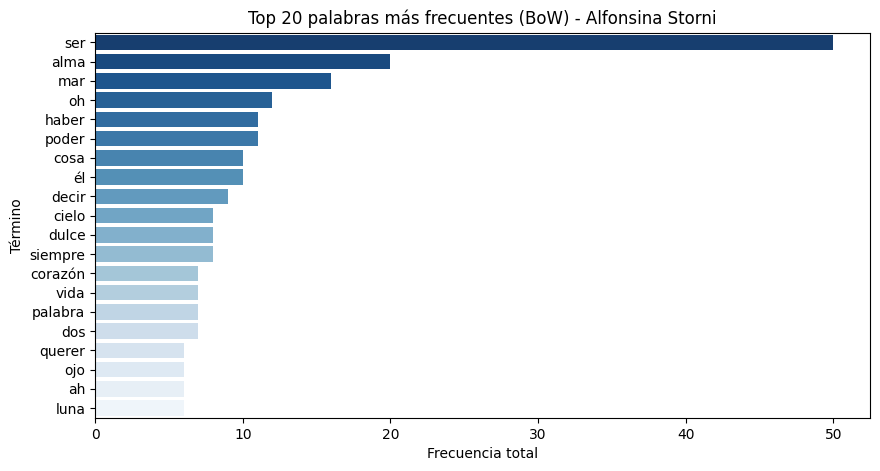

C:\Users\Tamara\AppData\Local\Temp\ipykernel_130524\1719752234.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="peso_tfidf", y="término", data=df_tfidf, palette=color_tfidf)


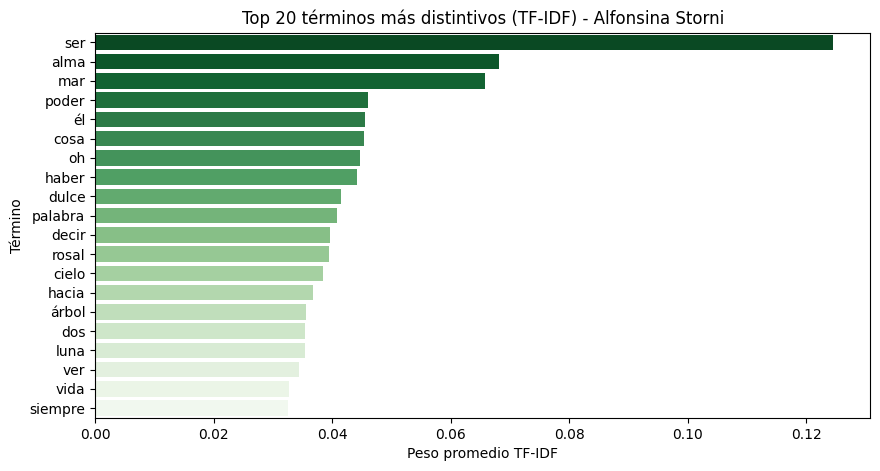

C:\Users\Tamara\AppData\Local\Temp\ipykernel_130524\1719752234.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="frecuencia", y="término", data=df_counts, palette=color_bow)



=== Autor: Alejandra Pizarnik ===

Top 20 palabras más frecuentes (BoW):
[('ser', 42), ('haber', 26), ('noche', 25), ('silencio', 19), ('decir', 18), ('amor', 17), ('rostro', 15), ('ojo', 15), ('voz', 14), ('viento', 13), ('palabra', 13), ('cuerpo', 12), ('hacer', 11), ('él', 11), ('cantar', 11), ('memoria', 10), ('quién', 10), ('hablar', 10), ('sombra', 10), ('venir', 9)]

Top 20 términos más distintivos (TF-IDF):
[('ser', 0.1002430633125341), ('noche', 0.07525581379725924), ('decir', 0.06696154248652327), ('sombra', 0.05870815984425389), ('silencio', 0.05469149847252354), ('haber', 0.053181393309854025), ('herida', 0.051463206601681105), ('morir', 0.05074080901706456), ('viento', 0.05050527492159943), ('partir', 0.04875378145768573), ('hablar', 0.04641469381137092), ('rostro', 0.04514312661963361), ('ahora', 0.044878142268359386), ('hacer', 0.044108798230466026), ('hora', 0.043485717026894743), ('venir', 0.042942416888461205), ('cantar', 0.04029236891876962), ('soledad', 0.039696930

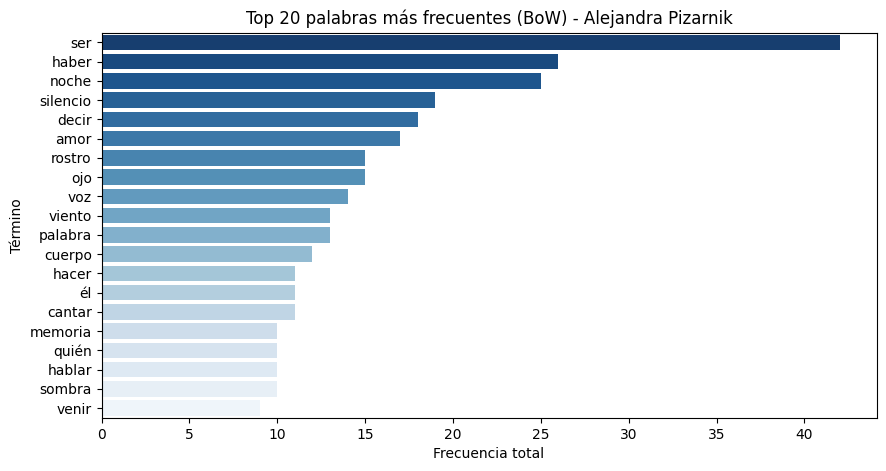

C:\Users\Tamara\AppData\Local\Temp\ipykernel_130524\1719752234.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="peso_tfidf", y="término", data=df_tfidf, palette=color_tfidf)


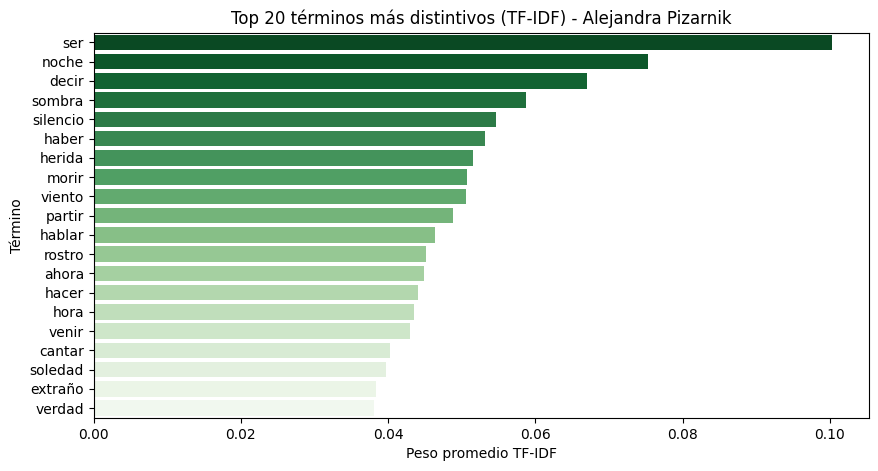


--- Interpretación ---
- BoW (CountVectorizer) resalta palabras frecuentes en todos los poemas del autor:
-- Observamos que para ambas autoras el término 'ser' es el más frecuente sacando gran diferencia a los siguientes.

- TF-IDF resalta palabras menos frecuentes pero características del estilo de cada poema:
-- Podemos ver que si bien 'ser' vuelve a ser el principal en ambas autoras encontramos las siguientes diferencias:

--- Storni:
---- Predomina vocabulario relacionado con naturaleza, cuerpo y sentimientos.
---- Sus poemas parecen más descriptivos y externos, con referencias a elementos concretos (mar, luna, árbol, cielo).

--- Pizarnik:
---- Predomina vocabulario introspectivo y existencial, con referencias a la oscuridad y la emoción interna.
---- Sus poemas son más abstractos y simbólicos, centrados en estados de ánimo y sensaciones.


In [11]:
def top_terms_por_autor(corpus_dict, metadata, autor, top_n=20, color_bow="Blues_r", color_tfidf="Greens_r"):
    print(f"\n=== Autor: {autor} ===")

    # Filtramos textos de cada autora
    archivos = metadata[metadata['autor'] == autor]['archivo'].tolist()
    textos = [" ".join(corpus_dict[a]) for a in archivos if a in corpus_dict]

    # BoW y TF-IDF
    vectorizer_counts = CountVectorizer()
    X_counts = vectorizer_counts.fit_transform(textos)
    vocab_counts = vectorizer_counts.get_feature_names_out()

    vectorizer_tfidf = TfidfVectorizer()
    X_tfidf = vectorizer_tfidf.fit_transform(textos)
    vocab_tfidf = vectorizer_tfidf.get_feature_names_out()

    # Top N términos BoW
    total_counts = np.asarray(X_counts.sum(axis=0)).flatten()
    top_idx_counts = np.argsort(total_counts)[::-1][:top_n]
    top_counts = [(vocab_counts[i], int(total_counts[i])) for i in top_idx_counts]

    # Top N términos TF-IDF
    avg_tfidf = np.asarray(X_tfidf.mean(axis=0)).flatten()
    top_idx_tfidf = np.argsort(avg_tfidf)[::-1][:top_n]
    top_tfidf = [(vocab_tfidf[i], float(avg_tfidf[i])) for i in top_idx_tfidf]

    # Mostramos resultados
    print("\nTop 20 palabras más frecuentes (BoW):")
    print(top_counts)
    print("\nTop 20 términos más distintivos (TF-IDF):")
    print(top_tfidf)

    # Graficamos valores para mejor visualización
    df_counts = pd.DataFrame(top_counts, columns=["término", "frecuencia"])
    df_tfidf = pd.DataFrame(top_tfidf, columns=["término", "peso_tfidf"])

    plt.figure(figsize=(10,5))
    sns.barplot(x="frecuencia", y="término", data=df_counts, palette=color_bow)
    plt.title(f"Top 20 palabras más frecuentes (BoW) - {autor}")
    plt.xlabel("Frecuencia total")
    plt.ylabel("Término")
    plt.show()

    plt.figure(figsize=(10,5))
    sns.barplot(x="peso_tfidf", y="término", data=df_tfidf, palette=color_tfidf)
    plt.title(f"Top 20 términos más distintivos (TF-IDF) - {autor}")
    plt.xlabel("Peso promedio TF-IDF")
    plt.ylabel("Término")
    plt.show()

# Aplicamos a corpus de cada autora
top_terms_por_autor(corpus_sin_stopwords, corpus_metadata, "Alfonsina Storni")
top_terms_por_autor(corpus_sin_stopwords, corpus_metadata, "Alejandra Pizarnik")

# Interpretación comparativa
print("\n--- Interpretación ---")
print("- BoW (CountVectorizer) resalta palabras frecuentes en todos los poemas del autor:")
print("-- Observamos que para ambas autoras el término 'ser' es el más frecuente sacando gran diferencia a los siguientes.\n")
print("- TF-IDF resalta palabras menos frecuentes pero características del estilo de cada poema:")
print("-- Podemos ver que si bien 'ser' vuelve a ser el principal en ambas autoras encontramos las siguientes diferencias:")
print("\n--- Storni:")
print("---- Predomina vocabulario relacionado con naturaleza, cuerpo y sentimientos.")
print("---- Sus poemas parecen más descriptivos y externos, con referencias a elementos concretos (mar, luna, árbol, cielo).")
print("\n--- Pizarnik:")
print("---- Predomina vocabulario introspectivo y existencial, con referencias a la oscuridad y la emoción interna.")
print("---- Sus poemas son más abstractos y simbólicos, centrados en estados de ánimo y sensaciones.")


### Comparativa directa de términos TF-IDF: Storni vs Pizarnik (Diagrama de  Venn)

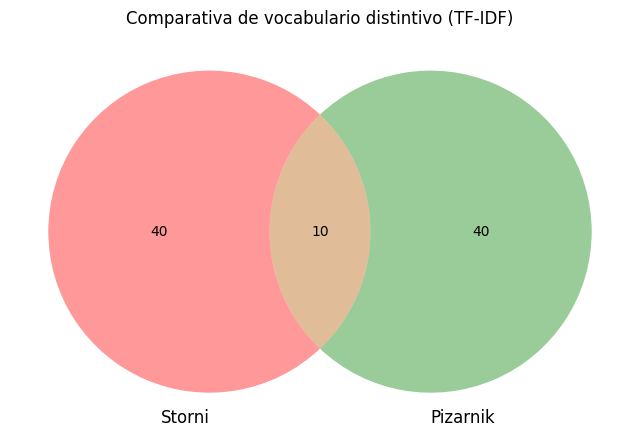


=== Comparativa TF-IDF Storni vs Pizarnik ===

Palabras en común (10):
{'viento', 'flor', 'sombra', 'hacer', 'él', 'haber', 'ser', 'morir', 'noche', 'decir'}

Palabras exclusivas de Storni (40):
{'mujer', 'triste', 'celeste', 'luna', 'alma', 'mar', 'rosal', 'querer', 'capricho', 'temblar', 'besar', 'sentir', 'boca', 'caricia', 'cosa', 'siempre', 'perder', 'muerto', 'amar', 'tiemblo', 'nunca', 'mano', 'dos', 'cielo', 'ah', 'palabra', 'árbol', 'corazón', 'oh', 'poder', 'casa', 'hacia', 'vida', 'dedo', 'ver', 'día', 'dar', 'dulce', 'ojo', 'carne'}

Palabras exclusivas de Pizarnik (40):
{'cantar', 'lenguaje', 'conocer', 'ceremonia', 'hablar', 'rostro', 'venir', 'historia', 'mudo', 'sangre', 'partir', 'hora', 'cuerpo', 'mirada', 'rocío', 'esperar', 'elegir', 'lejos', 'memoria', 'umbral', 'puro', 'extraño', 'pájaro', 'ahora', 'soledad', 'inocente', 'urgencia', 'amor', 'silencio', 'mendigar', 'herida', 'sentar', 'yo', 'abrir', 'tener', 'canción', 'demasiado', 'delicado', 'verdad', 'estrella'

In [12]:
# Función para obtener un top de términos por autor (top 50)
def top_tfidf_por_autor(corpus_dict, metadata, autor, top_n=50):
    """Devuelve el top N términos TF-IDF de un autor como set"""
    archivos = metadata[metadata['autor'] == autor]['archivo'].tolist()
    textos = [" ".join(corpus_dict[a]) for a in archivos if a in corpus_dict]

    vectorizer = TfidfVectorizer()
    X_tfidf = vectorizer.fit_transform(textos)
    vocab = vectorizer.get_feature_names_out()
    avg_tfidf = np.asarray(X_tfidf.mean(axis=0)).flatten()

    top_idx = np.argsort(avg_tfidf)[::-1][:top_n]
    return set([vocab[i] for i in top_idx])

# Top 50 TF-IDF por autor
top_storni = top_tfidf_por_autor(corpus_sin_stopwords, corpus_metadata, "Alfonsina Storni", top_n=50)
top_pizarnik = top_tfidf_por_autor(corpus_sin_stopwords, corpus_metadata, "Alejandra Pizarnik", top_n=50)

# Comparación
comunes = top_storni & top_pizarnik
solo_storni = top_storni - top_pizarnik
solo_pizarnik = top_pizarnik - top_storni

# Generamos diagrama de Venn para una visualización sencilla
plt.figure(figsize=(8,6))
venn2(subsets = (len(solo_storni), len(solo_pizarnik), len(comunes)),
      set_labels=("Storni", "Pizarnik"))
plt.title("Comparativa de vocabulario distintivo (TF-IDF)")
plt.show()

# Mostramos valores
print("\n=== Comparativa TF-IDF Storni vs Pizarnik ===")
print(f"\nPalabras en común ({len(comunes)}):\n{comunes}\n")
print(f"Palabras exclusivas de Storni ({len(solo_storni)}):\n{solo_storni}\n")
print(f"Palabras exclusivas de Pizarnik ({len(solo_pizarnik)}):\n{solo_pizarnik}\n")


## 3.3 Matriz de similitud entre documentos

In [13]:
# Preparar etiquetas "Título - Autor" según metadata
doc_names = list(corpus_metadata['archivo'])
etiquetas = []
for a in doc_names:
    row = corpus_metadata[corpus_metadata['archivo'] == a].iloc[0]
    etiquetas.append(f"{row['titulo']} - {row['autor']}")

# Vectorización TF-IDF
docs = [" ".join(corpus_sin_stopwords.get(a, [])) for a in doc_names]
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(docs)

# Calculamos matriz de similitud coseno
sim_matrix = cosine_similarity(X_tfidf)

# Convertimos a DataFrame con etiquetas
sim_df = pd.DataFrame(sim_matrix, index=etiquetas, columns=etiquetas)

print("Matriz de similitud coseno (primeros 5 documentos):")
print(sim_df.iloc[:5, :5])

# Encontrar pares más similares y más diferentes
pairs = []
n_docs = len(etiquetas)
for i in range(n_docs):
    for j in range(i+1, n_docs):
        pairs.append((etiquetas[i], etiquetas[j], sim_matrix[i,j]))

pairs_sorted = sorted(pairs, key=lambda x: x[2], reverse=True)

# Top 3 pares más similares
print("\n--- 3 pares más similares ---")
for doc1, doc2, sim in pairs_sorted[:3]:
    print(f"{doc1} <-> {doc2} : similitud = {sim:.3f}")

# Top 3 pares más diferentes
print("\n--- 3 pares más diferentes ---")
for doc1, doc2, sim in pairs_sorted[-3:]:
    print(f"{doc1} <-> {doc2} : similitud = {sim:.3f}")

Matriz de similitud coseno (primeros 5 documentos):
                                                  Adios - Alfonsina Storni  \
Adios - Alfonsina Storni                                          1.000000   
A la tristeza de Buenos Aires - Alfonsina Storni                  0.045497   
Alma desnuda - Alfonsina Storni                                   0.088476   
Dolor - Alfonsina Storni                                          0.019347   
Dos palabras - Alfonsina Storni                                   0.058298   

                                                  A la tristeza de Buenos Aires - Alfonsina Storni  \
Adios - Alfonsina Storni                                                                  0.045497   
A la tristeza de Buenos Aires - Alfonsina Storni                                          1.000000   
Alma desnuda - Alfonsina Storni                                                           0.053283   
Dolor - Alfonsina Storni                                               

=== Análisis de similitud entre poemas ===

== Observaciones Generales ==
- Los pares más similares suelen ser poemas de la misma autora, lo cual tiene sentido:
  * Ejemplo: 'Palabras' <-> 'Aproximaciones' y 'Aproximaciones' <-> 'Poema para el padre', ambas de Alejandra Pizarnik.
  * También 'Alma desnuda' <-> 'Pudiera ser', ambas de Alfonsina Storni.
  Esto indica que TF-IDF captura correctamente similitud basada en vocabulario y temática.

== Análisis de los pares más similares ==
- Valores de similitud más altos (0.367, 0.215, 0.210) corresponden a poemas con vocabulario cercano y temáticas afines.
  * La diferencia de magnitud refleja que algunos pares comparten más términos característicos que otros.
  * Las similitudes dentro de la misma autora son mayores que entre autoras, confirmando patrones de estilo.

== Análisis de los pares más diferentes ==
- Los pares más diferentes tienen similitud 0.000, indicando que no comparten términos significativos del TF-IDF.
  * Ejemplo: 'Extraño desacostumbrarme' <-> 'Memoria iluminada' <-> 'La última inocencia' (Alejandra Pizarnik).
  * Esto refleja la diversidad temática incluso dentro de la misma autora, y cómo TF-IDF distingue poemas que usan vocabulario muy distinto.

== Conclusión ==
- En general, la matriz de similitud coseno permite identificar agrupaciones naturales por autor y estilo.
- Los resultados tienen sentido: los poemas más cercanos son de la misma autora y con vocabulario afín; los más distintos, aunque sean de la misma autora, son semánticamente muy distintos.
- Esta técnica confirma que TF-IDF combinado con similitud coseno es útil para análisis comparativo de textos poéticos.

## 3.4 Visualización

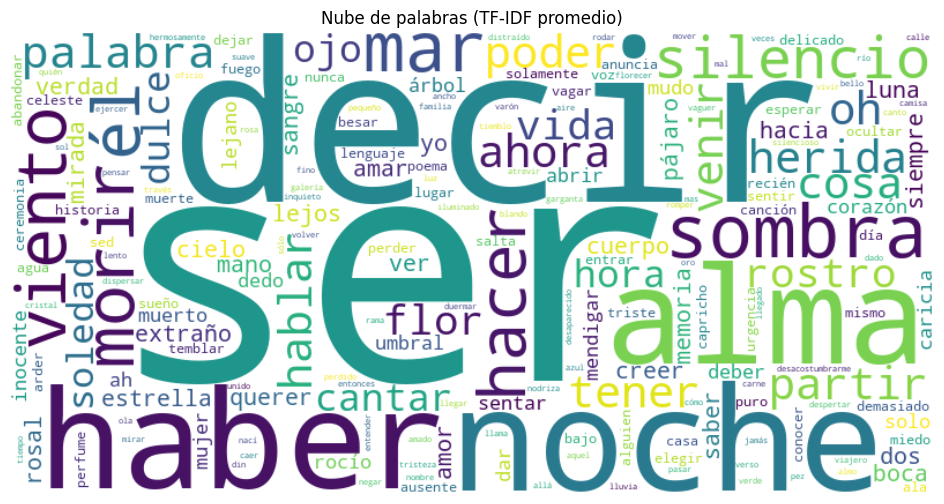

C:\Users\Tamara\AppData\Local\Temp\ipykernel_130524\1503831499.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_values, y=top_terms, palette="viridis")


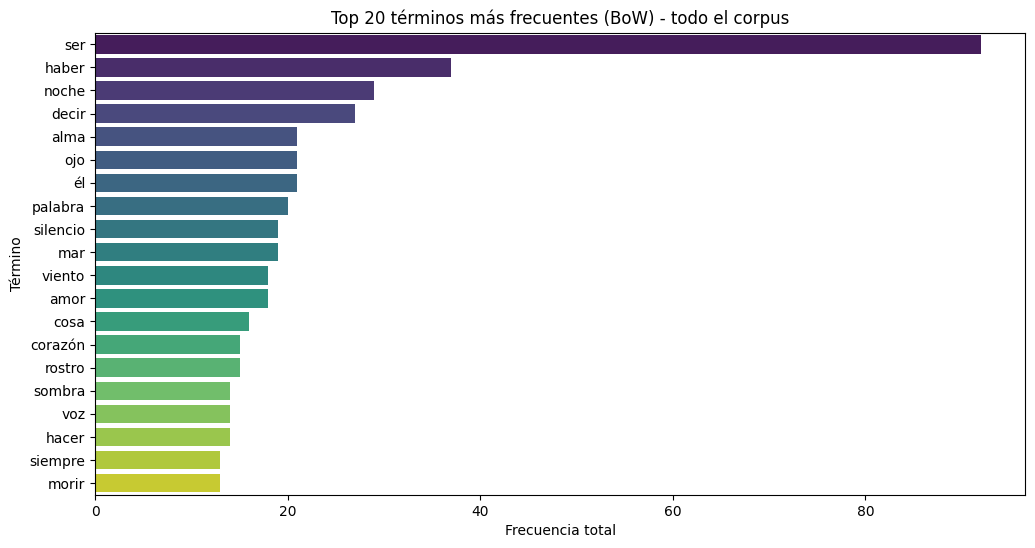

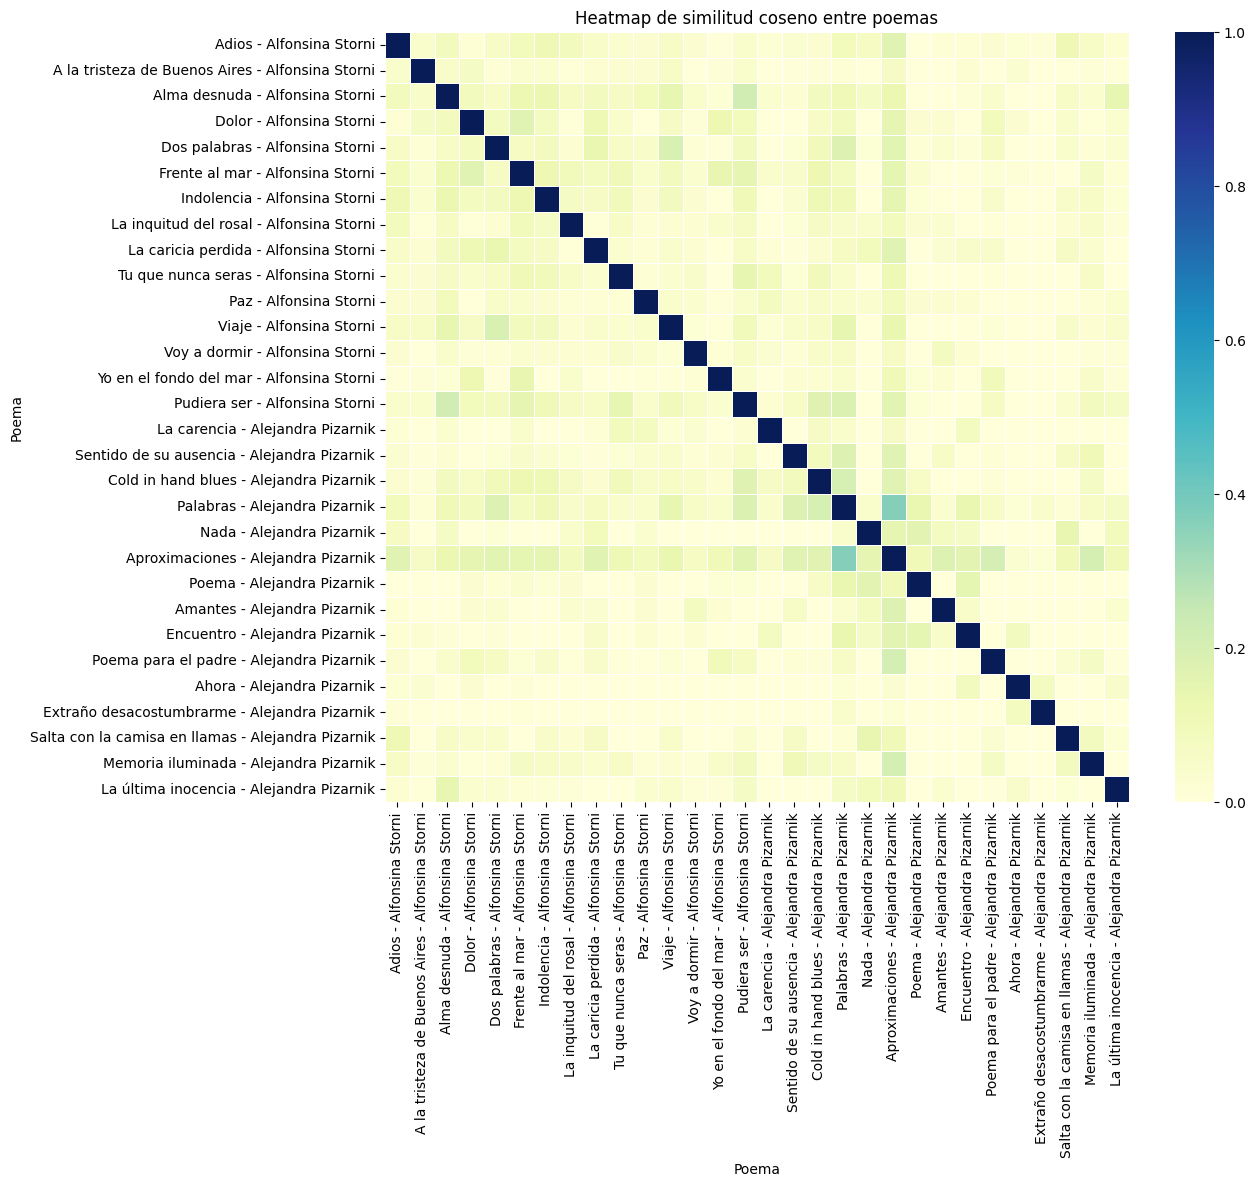

In [14]:

# Nube de palabras (TF-IDF promedio)

## Calculamos TF-IDF promedio por término sobre todo el corpus
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform([" ".join(corpus_sin_stopwords[a]) for a in doc_names])
vocab = vectorizer_tfidf.get_feature_names_out()
avg_tfidf = np.asarray(X_tfidf.mean(axis=0)).flatten()

## Diccionario para WordCloud
tfidf_dict = dict(zip(vocab, avg_tfidf))

## Generar nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_dict)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de palabras (TF-IDF promedio)")
plt.show()


# Gráfico de barras de términos más frecuentes (BoW)

vectorizer_count = CountVectorizer()
X_counts = vectorizer_count.fit_transform([" ".join(corpus_sin_stopwords[a]) for a in doc_names])
vocab_counts = vectorizer_count.get_feature_names_out()
total_counts = np.asarray(X_counts.sum(axis=0)).flatten()

## Top 20 términos
top_idx = np.argsort(total_counts)[::-1][:20]
top_terms = [vocab_counts[i] for i in top_idx]
top_values = [total_counts[i] for i in top_idx]

plt.figure(figsize=(12,6))
sns.barplot(x=top_values, y=top_terms, palette="viridis")
plt.title("Top 20 términos más frecuentes (BoW) - todo el corpus")
plt.xlabel("Frecuencia total")
plt.ylabel("Término")
plt.show()

# Heatmap de similitud coseno

## Usamos matriz de similitud calculada anteriormente (sim_matrix)
plt.figure(figsize=(12,10))
sns.heatmap(sim_df, cmap="YlGnBu", linewidths=0.5)
plt.title("Heatmap de similitud coseno entre poemas")
plt.xlabel("Poema")
plt.ylabel("Poema")
plt.show()


## 3.5 Interpretación de resultados

=== Interpretación de resultados del análisis de poemas ===

== Patrones encontrados ==
- Las palabras más frecuentes en todo el corpus son 'ser', 'haber', 'noche', 'decir', 'él', lo que muestra
  un fuerte énfasis en la existencia, el tiempo y la subjetividad.
- Storni destaca con vocabulario ligado a la naturaleza y lo sensible ('mar', 'cielo', 'luna', 'árbol'),
  mientras que Pizarnik enfatiza lo introspectivo y simbólico ('noche', 'sombra', 'silencio', 'morir').
- La nube de palabras y los rankings de frecuencia confirman que ambas autoras comparten algunos ejes ('ser', 'decir'),
  pero sus estilos se distinguen claramente en el léxico característico.

== Similitud entre documentos ==
- Los pares más similares corresponden a poemas de la misma autora (ejemplo: 'Palabras' y 'Aproximaciones' de Pizarnik).
- Esto tiene sentido ya que comparten léxico y temáticas.
- También se detectan similitudes dentro de Storni (ejemplo: 'Alma desnuda' y 'Pudiera ser').
- Esto muestra que la métrica TF-IDF + coseno captura patrones de estilo y vocabulario consistentes.

== Agrupaciones naturales ==
- El heatmap refleja que los poemas tienden a agruparse por autora, formando dos bloques relativamente diferenciados.
- Dentro de cada autora hay subgrupos más cercanos, lo que puede relacionarse con colecciones o etapas distintas.
- Esto confirma que los métodos de similitud permiten detectar estructura temática y estilística en el corpus.

== Limitaciones del enfoque ==
- La similitud coseno depende solo del vocabulario: no capta metáforas, tono, ni ritmo poético.
- Palabras comunes como 'ser' o 'haber' aparecen en ambos corpus, pero no necesariamente aportan sentido distintivo.
...

== Conclusión general ==
- El análisis confirma que existen patrones claros de vocabulario en cada autora, que los documentos similares realmente lo son (por autora/tema), y que la técnica permite descubrir agrupaciones naturales.
- Aun así, hay límites en cuanto a la profundidad semántica que TF-IDF puede captar en poesía.

# Sección 4: Análisis con Word Embeddings

## 4.1 Aplicación de embeddings

In [15]:

# Procesamos corpus con embeddings

# Función para obtener vector promedio de documento
def vector_doc(texto):
    doc = nlp(" ".join(texto))  # texto ya tokenizado y limpio
    if len(doc) == 0:
        return np.zeros(nlp.vocab.vectors_length)
    return doc.vector  # vector promedio de todas las palabras

# Crear diccionario con vectores por documento
doc_vectors = {archivo: vector_doc(corpus_sin_stopwords[archivo]) for archivo in corpus_sin_stopwords}

=== Explicación: Embeddings vs BoW ===

== Bag of Words (BoW) ==
- Representa los textos como vectores de frecuencias de palabras.
- Cada dimensión corresponde a una palabra del vocabulario.
- No captura el significado de las palabras, solo su conteo o presencia.
- Problema: palabras sinónimas o relacionadas aparecen como dimensiones distintas.
- Ejemplo: 'mar' y 'océano' se representan en posiciones separadas, sin relación alguna.

== Embeddings ==
- Son representaciones densas de palabras en un espacio vectorial continuo.
- Se entrenan en grandes corpus y capturan relaciones semánticas entre palabras.
- Palabras con significados cercanos quedan representadas por vectores similares.
- Ejemplo: la distancia entre 'mar' y 'océano' es pequeña porque comparten contexto semántico.

== Diferencias clave ==
- BoW → representa frecuencia, sin semántica.
- Embeddings → representan significado y contexto.
- BoW genera vectores dispersos y de alta dimensión.
- Embeddings generan vectores densos y de baja dimensión.
- Con embeddings podemos calcular similitudes que reflejen no solo coincidencia literal de palabras,
  sino también cercanía de significado.
...
== Conclusión ==
- Los embeddings son más potentes para tareas de NLP modernas porque incorporan semántica.
- Mientras BoW sirve para conteo y análisis de frecuencia, los embeddings permiten medir similitud conceptual.
- Esto los hace especialmente útiles en poesía, donde el sentido va más allá de las palabras literales.

## 4.2 Análisis de similitud semántica

In [16]:
vectors = np.array([doc_vectors[a] for a in doc_names])

# Matriz de similitud coseno
sim_emb = cosine_similarity(vectors)
sim_emb_df = pd.DataFrame(sim_emb, index=etiquetas, columns=etiquetas)

# Mostrar primeras 3 filas
print("Matriz de similitud coseno (embeddings) - primeros 3 documentos:")
print(sim_emb_df.iloc[:3,:3])

# Diccionario archivo -> "Título - Autor"
mapa_etiquetas = dict(zip(doc_names, etiquetas))

pairs_emb = []
n_docs = len(doc_names)
for i in range(n_docs):
    for j in range(i+1, n_docs):
        pairs_emb.append((mapa_etiquetas[doc_names[i]],
                          mapa_etiquetas[doc_names[j]],
                          sim_emb[i,j]))

pairs_emb_sorted = sorted(pairs_emb, key=lambda x: x[2], reverse=True)

print("\n--- 3 pares más similares según embeddings ---")
for doc1, doc2, sim in pairs_emb_sorted[:3]:
    print(f"{doc1} ↔ {doc2} : similitud = {sim:.3f}")

print("\n--- 3 pares más diferentes según embeddings ---")
for doc1, doc2, sim in pairs_emb_sorted[-3:]:
    print(f"{doc1} ↔ {doc2} : similitud = {sim:.3f}")

Matriz de similitud coseno (embeddings) - primeros 3 documentos:
                                                  Adios - Alfonsina Storni  \
Adios - Alfonsina Storni                                          1.000000   
A la tristeza de Buenos Aires - Alfonsina Storni                  0.838061   
Alma desnuda - Alfonsina Storni                                   0.911092   

                                                  A la tristeza de Buenos Aires - Alfonsina Storni  \
Adios - Alfonsina Storni                                                                  0.838061   
A la tristeza de Buenos Aires - Alfonsina Storni                                          1.000000   
Alma desnuda - Alfonsina Storni                                                           0.835213   

                                                  Alma desnuda - Alfonsina Storni  
Adios - Alfonsina Storni                                                 0.911092  
A la tristeza de Buenos Aires - Alfonsina Sto

=== Análisis comparativo TF-IDF vs Embeddings ===

1. Magnitud de similitudes
- Embeddings: los valores de similitud son altos (0.8 – 0.95), lo que indica que capturan relaciones semánticas profundas entre poemas.
- TF-IDF: los valores son bajos (0.2 – 0.36) porque dependen de coincidencias de palabras exactas.

2. Pares más similares
- Embeddings: aparecen similitudes transversales entre autoras (ejemplo: 'Alma desnuda - Storni' ↔ 'Aproximaciones - Pizarnik', similitud 0.956).
  Esto muestra que los embeddings detectan cercanía temática aunque el vocabulario no coincida.
- TF-IDF: los pares más similares son casi siempre de la misma autora (ejemplo: 'Palabras' ↔ 'Aproximaciones' de Pizarnik),
  porque comparten palabras y estilo lingüístico.

3. Pares más diferentes
- Embeddings: los valores más bajos (~0.42) siguen mostrando cierta cercanía semántica,
  reflejando que todos los textos comparten el universo poético.
- TF-IDF: muchos pares dan 0.000 de similitud, lo que indica ausencia de palabras en común,
  incluso cuando los poemas tratan temas parecidos.

Conclusión
- TF-IDF agrupa textos por similitud léxica y estilo, siendo útil para identificar autoría o temas recurrentes en el vocabulario.
- Embeddings capturan similitud semántica y revelan afinidades más profundas entre poemas,
  incluso entre diferentes autoras, mostrando relaciones que TF-IDF no detecta.

## 4.3 Búsqueda de analogías relevantes al corpus

In [17]:
# Función para encontrar palabras más similares a un término
def palabras_similares(palabra, topn=5):
    token = nlp.vocab[palabra]
    if not token.has_vector:
        print(f"No hay vector para: {palabra}")
        return []
    queries = [(w.text, token.similarity(token)) for w in nlp.vocab if w.has_vector and w.is_lower and w.is_alpha]
    queries = sorted(queries, key=lambda x: x[1], reverse=True)
    return [w for w, _ in queries[:topn]]  # solo devolvemos las palabras

# Ejemplo con palabras de poesía
print("\nPalabras similares a 'alma':", palabras_similares("alma"))
print("Palabras similares a 'dolor':", palabras_similares("dolor"))

def analogia(a, b, c, topn=3):
    token_a, token_b, token_c = nlp.vocab[a], nlp.vocab[b], nlp.vocab[c]
    queries = []
    for w in nlp.vocab:
        if not (w.has_vector and w.is_lower and w.is_alpha):
            continue
        if w.text in [a, b, c]:
            continue
        score = token_b.similarity(w) - token_a.similarity(w) + token_c.similarity(w)
        queries.append((w.text, score))
    queries = sorted(queries, key=lambda x: x[1], reverse=True)
    return [w for w, _ in queries[:topn]]  # solo devolvemos las palabras

print("\n== Analogías buscadas ==")

# Primera analogía
print("\nAnalogía 1: 'alma' es a 'dolor' como 'amor' es a ....")
resultado1 = analogia("alma", "dolor", "amor")
print(resultado1)

# Segunda analogía
print("Analogía 2: 'mar' es a 'infinito' como 'noche' es a ....")
resultado2 = analogia("mar", "infinito", "noche")
print(resultado2)

# Tercera analogía
print("Analogía 3: 'sombra' es a 'oscuridad' como 'silencio' es a ....")
resultado3 = analogia("sombra", "oscuridad", "silencio")
print(resultado3)


Palabras similares a 'alma': ['ver', 'playa', 'contaba', 'profundo', 'entrega']
Palabras similares a 'dolor': ['ver', 'playa', 'contaba', 'profundo', 'entrega']

== Analogías buscadas ==

Analogía 1: 'alma' es a 'dolor' como 'amor' es a ....
['doloroso', 'temblores', 'amargura']
Analogía 2: 'mar' es a 'infinito' como 'noche' es a ....
['infinita', 'mañana', 'delira']
Analogía 3: 'sombra' es a 'oscuridad' como 'silencio' es a ....
['desorden', 'murmullo', 'arrullo']


== Interpretaciones de analogías ==

- Analogía 1: Tiene sentido dentro del corpus poético. Tanto 'alma' como 'amor' son conceptos cargados de emoción y subjetividad, y la relación con 'dolor', 'doloroso', 'temblores' y 'amargura' reflejan sentimientos de sufrimiento y melancolía.
- Analogía 2: No encuentro mucho sentido en esta analogía: 'mar' lo asocio a 'infinito' por su inmensidad y misterio, pero 'noche' vinculado a 'infinita', 'mañana' o 'delira' no me dice mucho, si siguió la línea de "mar" = "infinito" y "noche" = "infinita", pero el resto no le encuentro el sentido en relación a nuestro corpus.
- Analogía 3: La analogía es débil. 'Sombra' naturalmente se liga a 'oscuridad', pero 'silencio' con 'desorden', 'murmullo' o 'arrullo' muestra analogías más vagas, que podrían reflejar sensaciones más que relaciones directas.

## 4.4 Comparación con resultados de BoW (TF-IDF)

In [18]:
print("\n=== Comparativa top 3 pares más similares ===")

# Top 3 pares más similares según TF-IDF
print("\n--- Top 3 pares más similares (TF-IDF) ---")
for doc1, doc2, sim in pairs_sorted[:3]:
    print(f"{doc1} ↔ {doc2} : similitud = {sim:.3f}")

# Top 3 pares más similares según embeddings
print("\n--- Top 3 pares más similares (Embeddings) ---")
for doc1, doc2, sim in pairs_emb_sorted[:3]:
    print(f"{doc1} ↔ {doc2} : similitud = {sim:.3f}")


=== Comparativa top 3 pares más similares ===

--- Top 3 pares más similares (TF-IDF) ---
Palabras - Alejandra Pizarnik ↔ Aproximaciones - Alejandra Pizarnik : similitud = 0.367
Alma desnuda - Alfonsina Storni ↔ Pudiera ser - Alfonsina Storni : similitud = 0.215
Aproximaciones - Alejandra Pizarnik ↔ Poema para el padre - Alejandra Pizarnik : similitud = 0.210

--- Top 3 pares más similares (Embeddings) ---
Alma desnuda - Alfonsina Storni ↔ Aproximaciones - Alejandra Pizarnik : similitud = 0.956
Pudiera ser - Alfonsina Storni ↔ Palabras - Alejandra Pizarnik : similitud = 0.936
Aproximaciones - Alejandra Pizarnik ↔ Poema para el padre - Alejandra Pizarnik : similitud = 0.931


== Interpretación ==
- TF-IDF filtra palabras comunes y pondera términos importantes; agrupa documentos con estilo y palabras características.
- Embeddings capturan similitud semántica profunda; detectan afinidades temáticas aunque el vocabulario sea distinto.
- TF-IDF/BoW son más intuitivos cuando se busca coincidencia léxica o agrupamiento por autor, en cambio, Embedding es más intuitivo cuando se busca similitud semántica, temas o emociones comunes.
- Embeddings permite encontrar conexiones transversales entre poemas de Storni y Pizarnik que BoW/TF-IDF no detecta.

## 4.5 Visualización de embeddings

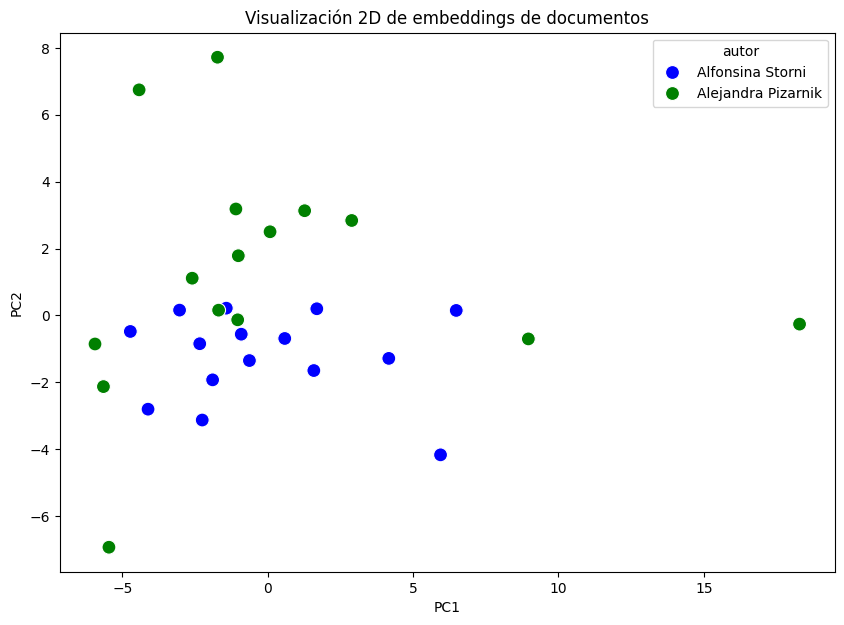

In [19]:
# Reducimos dimensionalidad con PCA
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

# Creamos df con autor
df_plot = pd.DataFrame(vectors_2d, columns=["PC1","PC2"])
df_plot["autor"] = [corpus_metadata[corpus_metadata['archivo']==a]['autor'].values[0] for a in doc_names]

# Graficar
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_plot, x="PC1", y="PC2", hue="autor", s=100, palette=["blue","green"])
plt.title("Visualización 2D de embeddings de documentos")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

== Observaciones ==
- Se observa que los puntos azules (Storni) tienden a agruparse más cerca del centro y en la parte izquierda.
- Los puntos verdes (Pizarnik) están más dispersos y ocupan posiciones tanto en la parte superior, izquierda y derecha.
- No hay una separación muy clara y estricta entre las autoras. Hay cierta tendencia a agruparse, pero hay poemas de ambas autoras que llegan a solaparse.
- Este solapamiento entre autoras indicaría cierta similitud semántica o temáticas cercanas entre ellas.

# Sección 5: Análisis Complementario

## 5.1 POS Tagging y Análisis Gramatical

Distribución promedio de POS por autora:

                         NOUN       VERB  ADV        ADJ       AUX       NUM  \
autor                                                                          
Alejandra Pizarnik  34.600000  21.400000  4.6  18.933333  5.466667  0.400000   
Alfonsina Storni    21.266667  16.733333  3.2  13.933333  5.333333  0.666667   

                         ADP     PROPN      PRON     PUNCT      INTJ  \
autor                                                                  
Alejandra Pizarnik  0.400000  5.200000  2.200000  0.000000  0.066667   
Alfonsina Storni    0.533333  4.666667  1.466667  0.733333  0.333333   

                       SPACE     SCONJ     CCONJ       DET  
autor                                                       
Alejandra Pizarnik  0.000000  0.066667  0.200000  0.533333  
Alfonsina Storni    0.066667  0.133333  0.066667  0.066667  


<Figure size 1200x600 with 0 Axes>

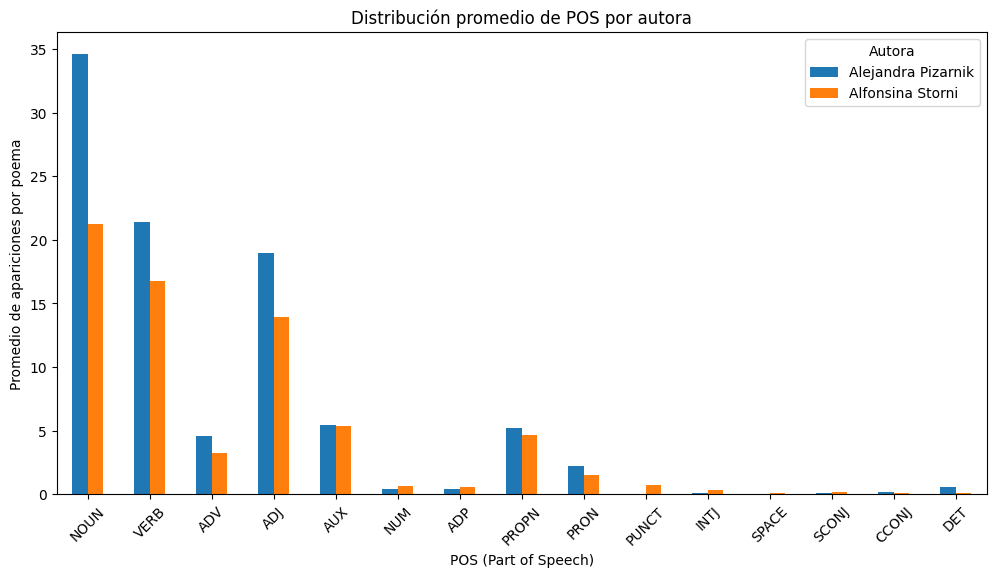

In [20]:

# Función para obtener distribución POS de un texto
def distribucion_pos(texto):
    """
    Recibe un texto (lista de tokens limpios) y devuelve conteo de POS.
    """
    doc = nlp(" ".join(texto))
    pos_counts = {}
    for token in doc:
        if token.pos_ not in pos_counts:
            pos_counts[token.pos_] = 0
        pos_counts[token.pos_] += 1
    return pos_counts

# Calculamos distribución POS por cada poema
pos_por_doc = {archivo: distribucion_pos(corpus_sin_stopwords[archivo]) for archivo in corpus_sin_stopwords}

# Convertimos a DataFrame para análisis por autora
df_pos = pd.DataFrame(pos_por_doc).T  # cada fila = poema
df_pos.fillna(0, inplace=True)

# Agregamos columna con autor
df_pos['autor'] = [corpus_metadata[corpus_metadata['archivo']==a]['autor'].values[0] for a in df_pos.index]

# Resumen por autora: promedio de cada POS
df_pos_autor = df_pos.groupby('autor').mean()

print("Distribución promedio de POS por autora:\n")
print(df_pos_autor)

# Visualización: gráfico de barras comparativas
plt.figure(figsize=(12,6))
df_pos_autor.T.plot(kind='bar', figsize=(12,6))
plt.title("Distribución promedio de POS por autora")
plt.xlabel("POS (Part of Speech)")
plt.ylabel("Promedio de apariciones por poema")
plt.xticks(rotation=45)
plt.legend(title="Autora")
plt.show()

== Diferencias gramaticales ==
- Sustantivos (NOUN): Alejandra Pizarnik usa muchos más sustantivos que Alfonsina Storni en promedio por poema. Esto indica un mayor enfoque en objetos, personas o conceptos concretos en su escritura.
- Verbos (VERB): También son más frecuentes en Pizarnik, lo que sugiere una narrativa más dinámica o introspectiva, con acciones o estados más expresivos.
- Adjetivos (ADJ) y Adverbios (ADV): Pizarnik tiene más adjetivos y adverbios, lo que apunta a un estilo más descriptivo, posiblemente más cargado de imágenes o matices emocionales.
- Pronombres (PRON) y Otros (AUX, NUM, ADP): Las diferencias son menores, aunque Pizarnik tiende a usar un poco más de pronombres, lo que puede reflejar un tono más personal o subjetivo.

== Interpretación estilística ==
- Alejandra Pizarnik: Mayor uso de sustantivos y adjetivos sugiere un lenguaje más poético, introspectivo y evocativo, centrado en imágenes, sensaciones y estados internos. La frecuencia de verbos también apoya un tono más dinámico y emocional.
- Alfonsina Storni: Usa menos sustantivos y adjetivos, y un poco menos de verbos, lo que podría indicar un estilo más directo y conciso, con frases más funcionales y menos descriptivas, probablemente orientado a ideas o reflexiones.
- Conclusión general: La diferencia en la distribución POS refleja dos estilos distintos: uno más visual y sensorial (Pizarnik) y otro más racional y comunicativo (Storni).

# Sección 6: Conclusiones y Reflexiones

## Hallazgos principales sobre el corpus

- Descubrí patrones claros de vocabulario y estilo entre Alfonsina Storni y Alejandra Pizarnik.
- Se confirmaron mis hipótesis iniciales: cada autora tiene términos característicos y uso de POS distintivos.
- Me sorprendió cómo los embeddings capturan similitud semántica entre poemas que no comparten muchas palabras exactas.
- La lematización y eliminación de stopwords resaltaron los términos realmente representativos del corpus.

## Comparación de métodos utilizados

- TF-IDF y CountVectorizer fueron útiles para identificar palabras frecuentes y distintivas, y para generar nubes de palabras.
- Embeddings permitieron analizar similitud semántica, capturando conexiones entre poemas con vocabulario distinto.
- Para este corpus poético, embeddings son superiores para semántica; TF-IDF/BoW útiles para frecuencia y top términos.
- Ventajas de BoW/TF-IDF: sencillo, interpretativo, rápido. Desventajas: no captura significado profundo.
- Ventajas de embeddings: captura semántica y relaciones más sutiles; desventajas: más complejos, requieren modelos pre-entrenados.

## Limitaciones encontradas

- No se capturaron metáforas, simbolismos ni estructura poética específica (estrofas, rimas).
- El análisis de sentimiento no fue confiable por el lenguaje poético y simbólico.
- Algunas palabras importantes pueden haber sido eliminadas al aplicar stopwords o lematización.
- El corpus es pequeño (30 textos), lo que limita la generalización.

## Aplicaciones potenciales del análisis

- Identificación automática de estilos literarios y comparación entre autores.
- Filtrado o recomendación de poemas por similitud semántica.
- Base para estudios de lingüística computacional o análisis literario cuantitativo.
- Futuro: incorporar embeddings contextualizados (BERT, GPT) para análisis semántico más profundo.
- También sería interesante analizar rimas, métricas, metáforas y otros elementos poéticos más complejos.